In [26]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
# CATEGORIES_old = [
#     "Data Storage & Databases",
#     "Data Pipelines",
#     "Data Querying & Fetching",
#     "Data Visualization",
#     "Storytelling & Reporting",
#     "Business Insights",
#     "Stats & Experimentation",
#     "ML Modeling",
#     "Model Evaluation & ML Ops",
#     "Software Engineering Practices",
#     "APIs & Frontend Integration",
# ]
CATEGORIES = [
    "Data Storage \n& Querying",
    "Data Pipelines",
    "Data Visualization \n& Analysis",
    "Experimentation \n& Reporting",
    "ML Modeling",
    "Model Deployment",
    "Explainability \n& Responsible AI",
    "Storytelling",
    "Decision support",
    # "Software Engineering Practices",
    "APIs & Integration",
]

LEVEL_TICKS = [1.0, 2.0, 3.0]
level_min, level_max = LEVEL_TICKS[0], LEVEL_TICKS[-1]
LEVEL_NAMES = {0.0: "zero", 1.0: "beginner", 2.0: "intermediate", 3.0: "expert"}

In [28]:
def make_radar_angles(n_axes: int) -> np.ndarray:
    """Angles for radar axes, closing the loop."""
    angles = np.linspace(0, 2 * math.pi, n_axes, endpoint=False)
    return np.concatenate([angles, angles[:1]])

def validate_profile(profile: dict[str, float]) -> list[float]:
    """
    Ensure profile keys match CATEGORIES exactly,
    and clamp values to [LEVEL_MIN, LEVEL_MAX].
    Returns values as a list ordered by CATEGORIES.
    """
    profile_keys = set(profile.keys())
    category_keys = set(CATEGORIES)

    missing = category_keys - profile_keys
    extra = profile_keys - category_keys

    if missing:
        raise ValueError(f"Missing categories in profile: {missing}")
    if extra:
        raise ValueError(f"Profile has unknown categories: {extra}")

    # Ordered and clamped values
    return [
        max(level_min, min(level_max, float(profile[cat])))
        for cat in CATEGORIES
    ]


In [29]:
def plot_radar(
    skills_dict: dict[str, float],
    label: str,
    color: str,
    alpha: float,
    ax: plt.Axes| None = None,
):
    """Plot a radar profile on given axis (create one if none)."""
    # Validate and order values by CATEGORIES
    vals = validate_profile(skills_dict)
    vals += vals[:1]  # close polygon

    n = len(CATEGORIES)
    angles = make_radar_angles(n)

    if ax is None:
        warnings.warn("No Axis object found, bulding it from scratch")
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=180)

    # set up everything here: angles, ticks, names, ...
    if n % 2 == 1:
        # odd number of verteces: straight at bottom
        offset_step = 0
    elif n > 2:
        # even number: symmetric, rotate half a step from bottom
        offset_step = math.pi / n
    ax.set_theta_offset(-math.pi / 2 + offset_step)

    ax.set_theta_direction(-1)
    ax.set_ylim(0, 3)

    # Radial ticks replaced with novice/intermediate/expert (invisible)
    ax.set_yticks(list(LEVEL_NAMES.keys()))
    # ax.set_yticklabels([LEVEL_NAMES[t] for t in LEVEL_NAMES.keys()])
    ax.set_yticklabels([])

    # Category names around the circle, first delete then set them manually
    ax.set_xticks([])

    label_radius = 1.15 * ax.get_ylim()[1]    # distance > 1.1 current y max

    # extra padding since more space is needed for angles ~90 and angles ~ 270

    for angle, category in zip(angles[:-1], CATEGORIES):

        extra_pad = 0.5*np.abs(math.sin(angle - offset_step))

        ax.text(
            angle,
            label_radius + extra_pad,
            category,
            ha="center",
            va="center",
            fontsize=12,
        )
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([])

    # Plot
    ax.plot(angles, vals, color=color, linewidth=2, label=label)
    ax.fill(angles, vals, color=color, alpha=0.25)

    return ax


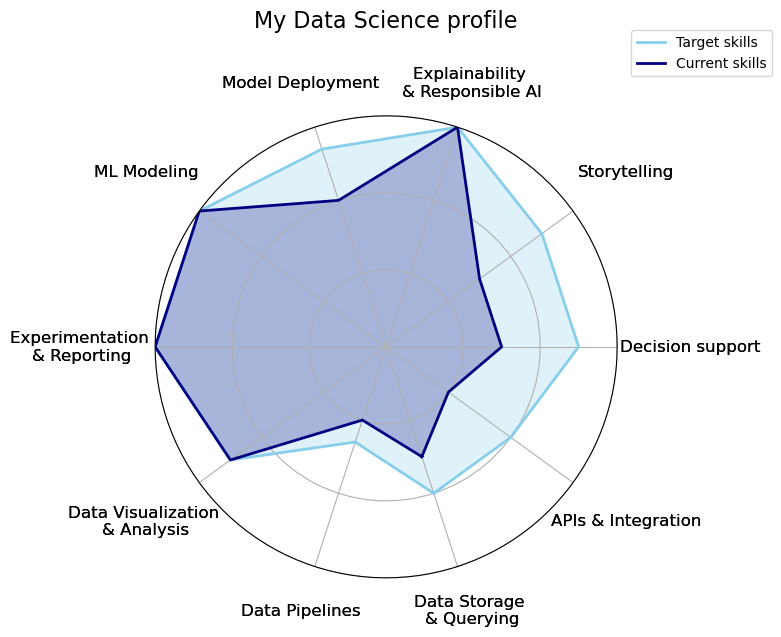

In [30]:
current_skills = {
    "Data Storage \n& Querying": 1.5,
    "Data Pipelines": 0.9,
    "Data Visualization \n& Analysis": 2.5,
    "Experimentation \n& Reporting": 3.0,
    "ML Modeling": 3.0,
    "Model Deployment": 2.0,
    "Explainability \n& Responsible AI": 3.0,
    "Storytelling": 1.5,
    "Decision support": 1.5,
    # "SE Practices": 1.8,
    "APIs & Integration": 1.0,
}


target_skills = {
    "Data Storage \n& Querying": 2.0,
    "Data Pipelines": 1.3,
    "Data Visualization \n& Analysis": 2.5,
    "Experimentation \n& Reporting": 3.0,
    "ML Modeling": 3.0,
    "Model Deployment": 2.7,
    "Explainability \n& Responsible AI": 3.0,
    "Storytelling": 2.5,
    "Decision support": 2.5,
    # "SE Practices": 2.5,
    "APIs & Integration": 2.0,
}

# Create one axis and overlay both plots
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=100)
ax.set_title("My Data Science profile", va="bottom", fontsize=16, pad=60)

plot_radar(target_skills, label="Target skills", color="skyblue", alpha=0.25, ax=ax)
plot_radar(current_skills, label="Current skills", color="navy", alpha=0.25, ax=ax)

ax.legend(loc="upper right", bbox_to_anchor=(1.35, 1.2))
plt.savefig("skills-chart-profile.png", bbox_inches="tight")
plt.show()